## 协同过滤--爱你所爱
这一章考察的推荐方法称为协同过滤（collaborative filtering）。之所以称为“协同”是因为该方法基于其他用户进行推荐。实际上，人们通过协同合作来形成推荐。其工作流程如下：假设要完成的任务是推荐一本书给你。我会在网站上搜索与你兴趣类似的其他用户。一旦找到这个用户，就看看这个用户所喜欢的书然后将它们推荐给你。

### 如何寻找相似用户
下面给出了3个用户对这两本书的评级结果：
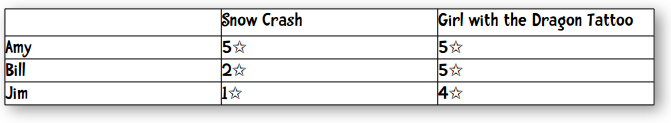

接下来要给一个神秘用户X女士推荐一本书，她给Snow Crash打了4星，而给Girl with the Dragon Tattoo只打了2星。第一步就是要找到与X女士最类似或者最近的用户，可以通过计算距离来实现这一点。

### 曼哈顿距离
在二维情况下，每个用户表示为点(x,y)，可以对x、y引入下标来表示不同的人。 因此，$(x_1, y_1)$可能是Amy，而$(x_2, y_2)$则可能是神秘的X女士。于是，她们之间的曼哈顿距离可以采用下式来计算：
$|x_1-x_2|+|y_1-y_2|$。

计算X女士和上述表格中的3个用户的曼哈顿距离会得到如下结果：
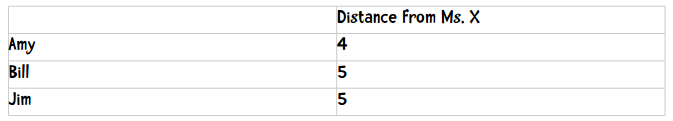

Amy是最相近的用户，于是我们可以考察她的历史评级情况。比如我们发现她给Paolo Bacigalupi的The Windup Girl打了5星，因此可以将这本书推荐给X女士。

### 欧氏距离
欧氏距离（Euclidean Distance）即两点的直线距离，利用勾股定理计算如下：
$\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$

### N维下的思考
上面的曼哈顿距离和欧式距离都是只考虑两个点的，我们可以扩展到N个点。比如下面是8个用户对8个乐队的评分：
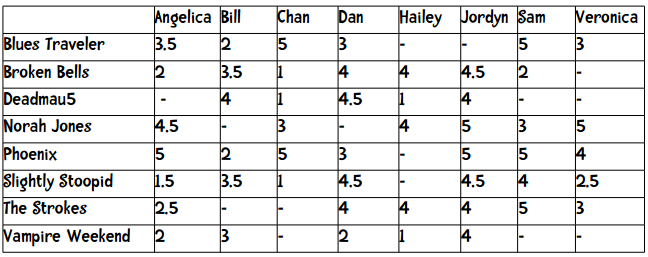

其中短线表示该用户没有对该乐队评分。分别用曼哈顿距离和欧式距离计算Angelica和Bill的距离：
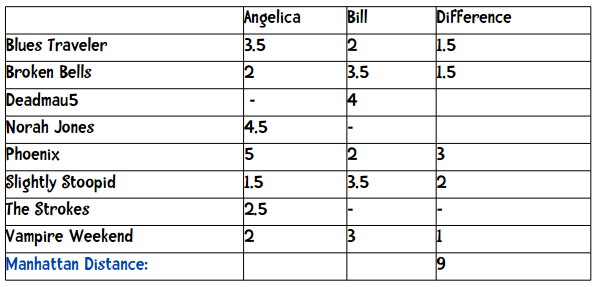

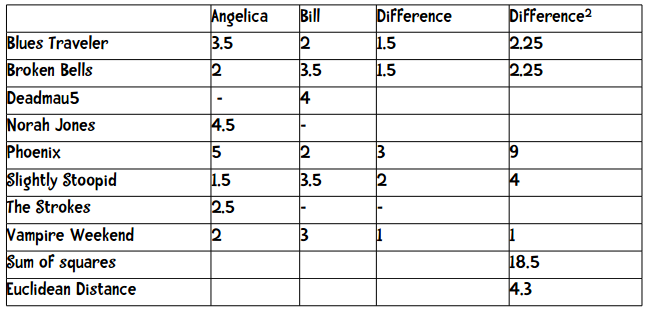

#### 一个缺陷
看上去我们发现了上述距离计算的一个缺陷。当计算Hailey和Veronica的距离时，我们注意到他们都评级的乐队只有两个（Norah Jones和The Strokes），而当计算Hailey和Jordyn的距离时，他们都评级的乐队却有5个。这样Hailey和Veronica的距离计算基于二维而Hailey和Jordyn的距离计算却基于五维，这看起来会使我们的距离计算有所偏斜。当没有缺失值时，曼哈顿距离和欧氏距离非常好。缺失值的处理是一个活跃的学术研究问题。

### 一般化
曼哈顿距离和欧氏距离可以一般化为如下的明氏距离（Minkowski Distance）：
$d(x,y) = (\sum_{k=1}^{n}|x_k-y_k|^r)^\frac{1}{r}$

可见，当r=1时，即曼哈顿距离；当r=2时，结果为欧式距离。**r越大，某一维上的较大差异对最终差值的影响也越大**。

### 计算曼哈顿距离的代码
下面的数据是用户对乐队的评分：

In [1]:
users = {
    "Angelica": {"Blues Traveler": 3.5, "Broken Bells": 2.0, "Norah Jones": 4.5, "Phoenix": 5.0, "Slightly Stoopid": 1.5, "The Strokes": 2.5, "Vampire Weekend": 2.0},
    "Bill":{"Blues Traveler": 2.0, "Broken Bells": 3.5, "Deadmau5": 4.0, "Phoenix": 2.0, "Slightly Stoopid": 3.5, "Vampire Weekend": 3.0},
    "Chan": {"Blues Traveler": 5.0, "Broken Bells": 1.0, "Deadmau5": 1.0, "Norah Jones": 3.0, "Phoenix": 5, "Slightly Stoopid": 1.0},
    "Dan": {"Blues Traveler": 3.0, "Broken Bells": 4.0, "Deadmau5": 4.5, "Phoenix": 3.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 2.0},
    "Hailey": {"Broken Bells": 4.0, "Deadmau5": 1.0, "Norah Jones": 4.0, "The Strokes": 4.0, "Vampire Weekend": 1.0},
    "Jordyn":  {"Broken Bells": 4.5, "Deadmau5": 4.0, "Norah Jones": 5.0, "Phoenix": 5.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 4.0},
    "Sam": {"Blues Traveler": 5.0, "Broken Bells": 2.0, "Norah Jones": 3.0, "Phoenix": 5.0, "Slightly Stoopid": 4.0, "The Strokes": 5.0},
    "Veronica": {"Blues Traveler": 3.0, "Norah Jones": 5.0, "Phoenix": 4.0, "Slightly Stoopid": 2.5, "The Strokes": 3.0}
    }

实现曼哈顿距离算法：

In [2]:
def manhattan(rating1, rating2):
    """Computes the Manhattan distance. Both rating1 and rating2 are dictionaries
       of the form {'The Strokes': 3.0, 'Slightly Stoopid': 2.5}"""
    distance = 0
    commonRatings = False 
    for key in rating1:
        if key in rating2:
            distance += abs(rating1[key] - rating2[key])
            commonRatings = True
    if commonRatings:
        return distance
    else:
        return -1 #Indicates no ratings in common

manhattan(users['Hailey'], users['Veronica']), manhattan(users['Hailey'], users['Jordyn'])

(2.0, 7.5)

可以定义一个寻找最近用户的函数，按照相似度从高到低的次序返回用户列表：

In [3]:
def computeNearestNeighbor(username, users):
    """creates a sorted list of users based on their distance to username"""
    distances = []
    for user in users:
        if user != username:
            distance = manhattan(users[user], users[username])
            distances.append((distance, user))
    # sort based on distance -- closest first
    distances.sort()
    return distances

computeNearestNeighbor('Hailey', users)

[(2.0, 'Veronica'),
 (4.0, 'Chan'),
 (4.0, 'Sam'),
 (4.5, 'Dan'),
 (5.0, 'Angelica'),
 (5.5, 'Bill'),
 (7.5, 'Jordyn')]

我们将上述代码整合在一起进行推荐。假设想为Hailey做推荐，我会找到她最近的邻居，这里是Veronica。然后我会找到那些Veronica评过级而Hailey没有评级的乐队。另外，假设Hailey会和Veronica一样对乐队评级（至少他们的评级十分类似）。例如，Hailey没有对Phoenix乐队评级，而Veronica对该乐队评了4星，因此给Hailey推荐Phoenix。下面给出了推荐函数：

In [4]:
def recommend(username, users):
    """Give list of recommendations"""
    # first find nearest neighbor
    nearest = computeNearestNeighbor(username, users)[0][1]

    recommendations = []
    # now find bands neighbor rated that user didn't
    neighborRatings = users[nearest]
    userRatings = users[username]
    for artist in neighborRatings:
        if not artist in userRatings:
            recommendations.append((artist, neighborRatings[artist]))
    # using the fn sorted for variety - sort is more efficient
    return sorted(recommendations, key=lambda artistTuple: artistTuple[1], reverse = True)

recommend('Hailey', users)

[('Phoenix', 4.0), ('Blues Traveler', 3.0), ('Slightly Stoopid', 2.5)]

我们在测试一下Angelica，发现结果为空，说明Angelica和离她最近的用户（Veronica）评分的乐队完全一样，因此没有推荐结果：

In [5]:
recommend('Angelica', users)

[]

后续章节我们将处理这个问题。

### 用户的评级差异
接下来对用户的评级结果进行深入的考察。我们发现，用户对乐队评级时的行为差异很大：

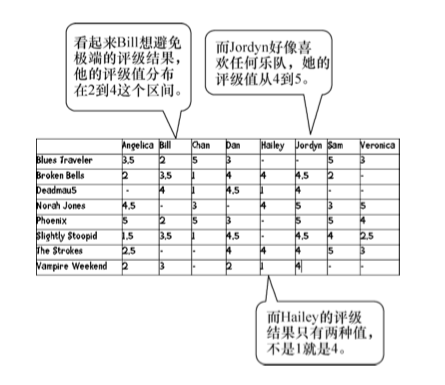

因此，应该如何对用户进行比较，比如说比较Hailey和Jordyn？Hailey的“4”是不是与Jordyn的“4”或“5”等价？这种差异性会在推荐系统中带来问题。

### 皮尔逊相关系数
考虑如下的数：

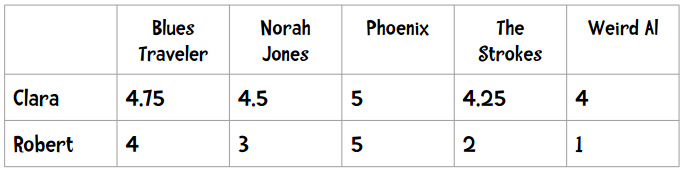

这是数据挖掘领域所称的“分数贬值”（grade inflation）的一个例子。Clara给出的最低评级为4星，其所有的评级都在4星和5星之间。如果将该例当中两个人的评级画成图，那 么就会得到如下结果：

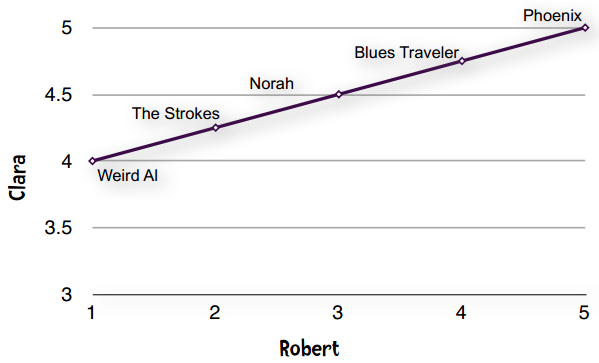

图中直线表示Clara和Robert的评级完全一致。他们都对Phonenix评级最高，然后是Blues Traveler、Norah Jones，等等。Clara和Robert的一致性越差，那么在直线上的数据点也越少。

皮尔逊相关系数是度量两个变量相关性的指标。其取值区间为[−1,1]。1表示完全一致，−1表示完全不一致。计算公式如下：
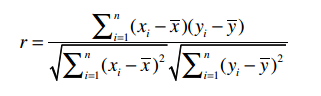

上面公式的一个问题在于算法时可能需要对数据进行多遍扫描。幸运的是，还有另一个皮尔逊相关系数的近似计算公式：
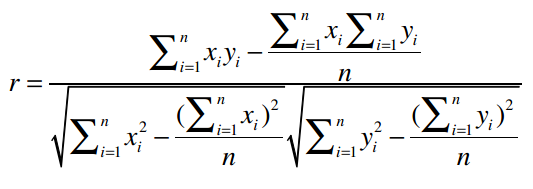

皮尔逊相关系数实现：

In [6]:
from math import sqrt

def pearson(rating1, rating2):
    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_x2 = 0
    sum_y2 = 0
    n = 0
    for key in rating1:
        if key in rating2:
            n += 1
            x = rating1[key]
            y = rating2[key]
            sum_xy += x * y
            sum_x += x
            sum_y += y
            sum_x2 += pow(x, 2)
            sum_y2 += pow(y, 2)
    # 计算分母
    denominator = sqrt(sum_x2 - pow(sum_x, 2) / n) * sqrt(sum_y2 - pow(sum_y, 2) / n)
    if denominator == 0:
        return 0
    else:
        return (sum_xy - (sum_x * sum_y) / n) / denominator

测试：

In [7]:
pearson(users['Angelica'], users['Bill']), pearson(users['Angelica'], users['Hailey'])

(-0.9040534990682699, 0.42008402520840293, 0.7639748605475432)

### 最后一个公式—余弦相似度
该公式不仅在文本挖掘中使用得非常普遍，而且也广泛用于协同过滤。

我在iTunes上大概有4000首歌曲，下面列出了按照播放次数从高到低排序的几首歌：
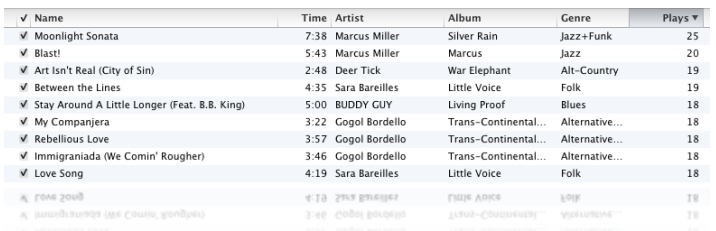

于是，我播放次数最多的音乐是Marcus Miller的Moonlight Sonata，播放次数为25。有可能你播放这首歌的次数为0。iTunes上有超过1.5亿首歌曲而我只有4000首。因此，对于个人而言，由于只有很少一部分属性非零（播放次数），所以数据是稀疏的。于是，当在1.5亿首歌上利用播放次数比较两个人时，绝大部分情况下它们之间的公共部分为零。但是，我们在计算相似度时并不希望使用这些公共的零。

一个类似的情况是利用词语来比较文本文档。

余弦相似度会忽略这种0-0匹配，其定义如下：
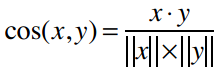

一个例子：
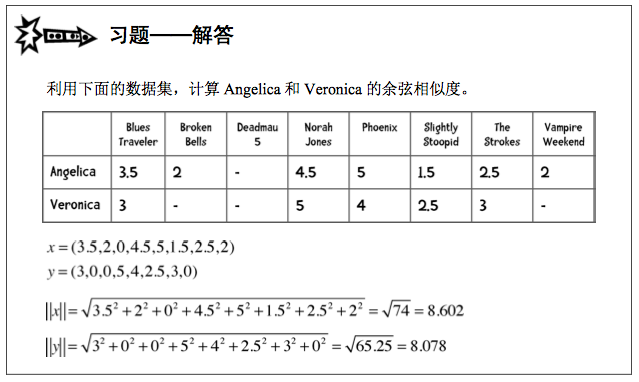
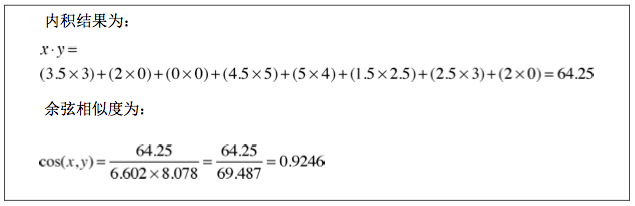

### 相似度的选择
如何选择相似度算法：
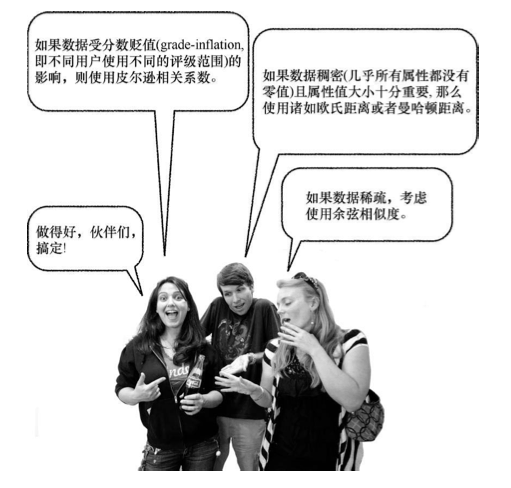

### k近邻
我们依赖于单个“最相似”的用户进行推荐。该用户的任何怪癖都会被推荐。一种解决办法是基于多个相似的用户进行推荐。这里我们可以使用k近邻方法。

假定我们使用k近邻（k=3）来对Ann进行推荐。最近的3个邻居及其与Ann的皮尔逊相关系数如下表所示：
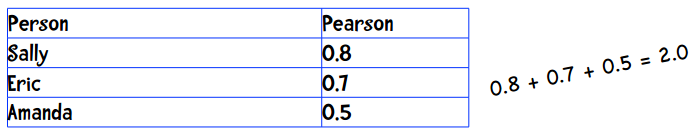

3个人中的每一个都会影响最后推荐的结果，问题在于如何确定每个人的影响程度:
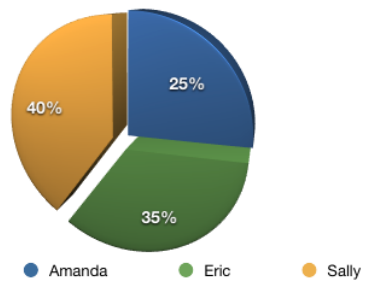

假设他们三人对Grey Wardens的评分以及加权后的结果如下：
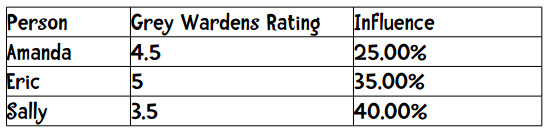

投影评级=(4.5×0.25)+(5×0.35)+(3.5×0.4)=4.275

### 基于python的一个推荐类
参考我的github代码库。